In [ ]:
# Adapted from code from: https://github.com/GlobalFishingWatch/data-blog-code
# pip install bq
# conda install basemap

# Writup on NM dims and using GIS layers
# https://globalfishingwatch.org/data-blog/working-with-our-downloadable-public-data-in-r/

# Interactive
# https://globalfishingwatch.org/map/

# Matplotlib Basemap Examples
# https://matplotlib.org/basemap/

# Set up BigQuery API key
# https://jingsblog.com/2018/11/27/connect-your-jupyter-notebook-to-the-bigquery

# Query Examples
# https://globalfishingwatch.org/data-blog/our-data-in-bigquery/

In [5]:
import bq
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors,colorbar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns

In [6]:
from google.cloud import bigquery
import os

# Edit bq.json based on download from API Key article above
crendential_path = str(os.path.expanduser('~')) + "\\Documents\\bq.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = crendential_path

# Instantiates a Bigquery client
client = bigquery.Client()

query = '''SELECT *
FROM
  `global-fishing-watch.global_footprint_of_fisheries.fishing_effort_byvessel`
WHERE
  _PARTITIONTIME >= "2016-11-01 00:00:00"
   AND _PARTITIONTIME < "2016-12-30 00:00:00"
'''

vessel = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
) # API request - starts the query


In [7]:
# vessel.to_dataframe()

In [8]:
import numpy as np

# lats_terr = np.array([float(v[1])/10 for v in vessel if v[3]=="terrestrial"])
# lons_terr = np.array([float(v[2])/10 for v in vessel if v[3]=="terrestrial"])
lats = np.array([float(v[1])/10 for v in vessel if v[3]!="terrestrial"])
lons = np.array([float(v[2])/10 for v in vessel if v[3]!="terrestrial"])

# Caused problems with land intersects
# for i in range(len(lons)): # adjust for the dateline
#     if lons[i]<0: lons[i] += 360/10
        
max_lat = lats.max()
min_lat = lats.min()
max_lon = lons.max()
min_lon = lons.min()

In [9]:
# figure out what the bounds should be
print(min_lat, max_lat)
print(min_lon, max_lon)

-77.8 81.9
-180.0 179.9


In [ ]:
# # adjust the bounds out a bit to get more of Japan and China
# min_lat = -40
# max_lat = 50
# max_lon = 180
# min_lon = 0

C:\Users\HomeVZ\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\HomeVZ\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
C:\Users\HomeVZ\Anaconda3\envs\py36\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


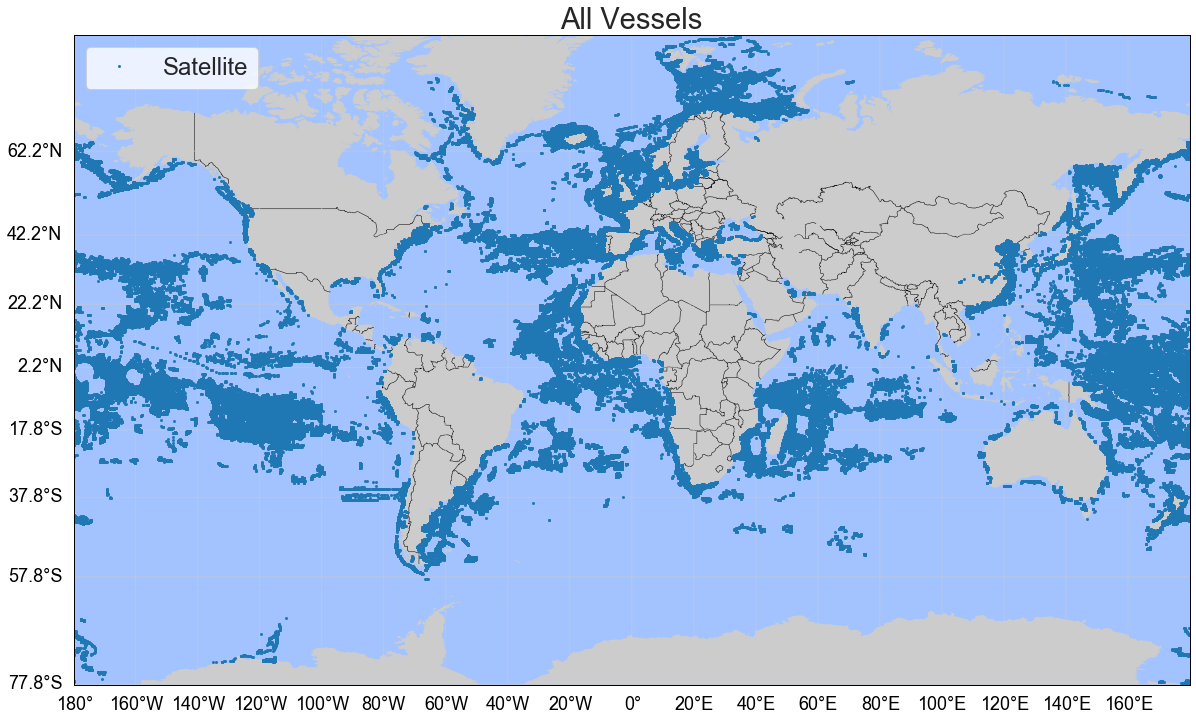

In [10]:
sns.set_style("white")
plt.figure(figsize=(20,20)) 

m = Basemap(llcrnrlon=min_lon, llcrnrlat=min_lat,
            urcrnrlon=max_lon, urcrnrlat=max_lat, projection='mill', resolution ='l')

m.drawmapboundary()
m.fillcontinents("#cccccc",lake_color="#cccccc")
parallels = np.arange(min_lat,max_lat,20.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=18,color='#cccccc')
meridians = np.arange(min_lon,max_lon,20.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18,color='#cccccc')

m.drawmapboundary(fill_color='#A2C3FF')
m.drawcountries()
x,y= m(lons,lats)
size = 3
m.plot(x,y,marker = 'o',markersize=size,markeredgecolor = 'none',
       alpha = 1,linestyle='None', label="Satellite")

# x,y= m(lons_terr,lats_terr)
# size = 3
# m.plot(x,y,marker = 'o',markersize=size,markeredgecolor = 'none',
#        alpha = 1,linestyle='None', label="Terrestrial", color = "red")


plt.title("All Vessels", 
         fontsize=29)
plt.legend(fontsize=24)
plt.show()